## Exercise 5

#### Name: Charles Kevin Bandala

#### Student Number: 202220041

In [1]:
# Libraries

library(fpp2)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.5 --

v ggplot2   3.4.1     v fma       2.5  
v forecast  8.21      v expsmooth 2.3  





### Part 1, hotel_occupancy data

#### Data

In [2]:
Philmonth <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilMonthlyData.csv", header = TRUE)

hotel <- ts(na.omit(Philmonth$hotel_occupancy), start = c(2000, 1), end = c(2009, 12), frequency = 12)

#### Train & Test dataset

In [3]:
hotel_train <- window(hotel, end = c(2007, 12)) # January 2000 - December 2007
hotel_test <- window(hotel, start = c(2008, 1)) # January 2008 - December 2009

#### 1)

**Show the best performing model based on the AICc of the training dataset**

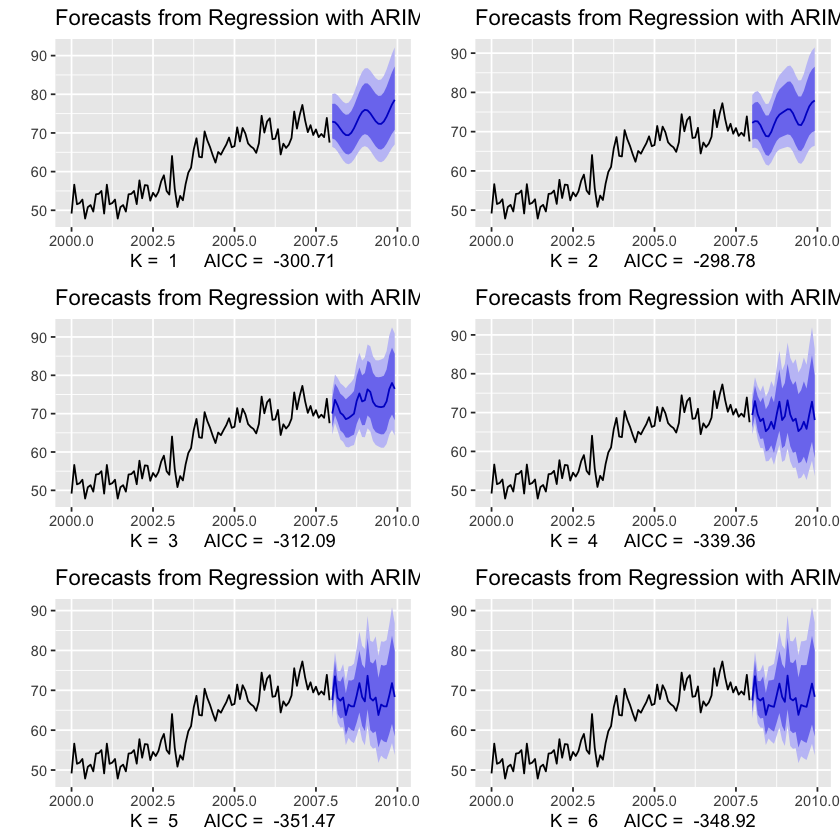

In [4]:
plots <- list()

for(i in seq(6)){
    fit <- auto.arima(hotel_train, xreg = fourier(hotel_train, K = i),
        seasonal = FALSE, lambda = 0)
    plots[[i]] <- autoplot(forecast(fit, xreg = fourier(hotel_train, K = i, h = 24))) +
    xlab(paste("K = ", i, "    AICC = ", round(fit[["aicc"]], 2))) +
    ylab("")
}

gridExtra::grid.arrange(
  plots[[1]], plots[[2]], plots[[3]],
  plots[[4]], plots[[5]], plots[[6]], nrow = 3)

In [6]:
hotel_best <- auto.arima(hotel_train, xreg = fourier(hotel_train, K = 5),
                        seasonal = FALSE, lambda = 0)
summary(hotel_best)

# Best model is Regression with ARIMA(1,1,0) errors

Series: hotel_train 
Regression with ARIMA(1,1,0) errors 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1   S1-12   C1-12    S2-12    C2-12    S3-12    C3-12    S4-12
      -0.4221  0.0151  0.0313  -0.0064  -0.0073  -0.0118  -0.0100  -0.0203
s.e.   0.0942  0.0067  0.0066   0.0038   0.0038   0.0031   0.0031   0.0032
        C4-12    S5-12   C5-12
      -0.0209  -0.0113  0.0130
s.e.   0.0032   0.0037  0.0037

sigma^2 = 0.00122:  log likelihood = 189.64
AIC=-355.27   AICc=-351.47   BIC=-324.62

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.2785759 2.010209 1.553698 0.4096109 2.517393 0.4789332
                     ACF1
Training set -0.003586093

**Show the state space system of equations form of the model with estimated parameter values**

![Alt text](<Screen Shot 2023-12-12 at 19.46.18.png>)

#### 2)

**Show a plot of the forecasted value of hotel_occupancy for the test data added into the plot of the full dataset.**

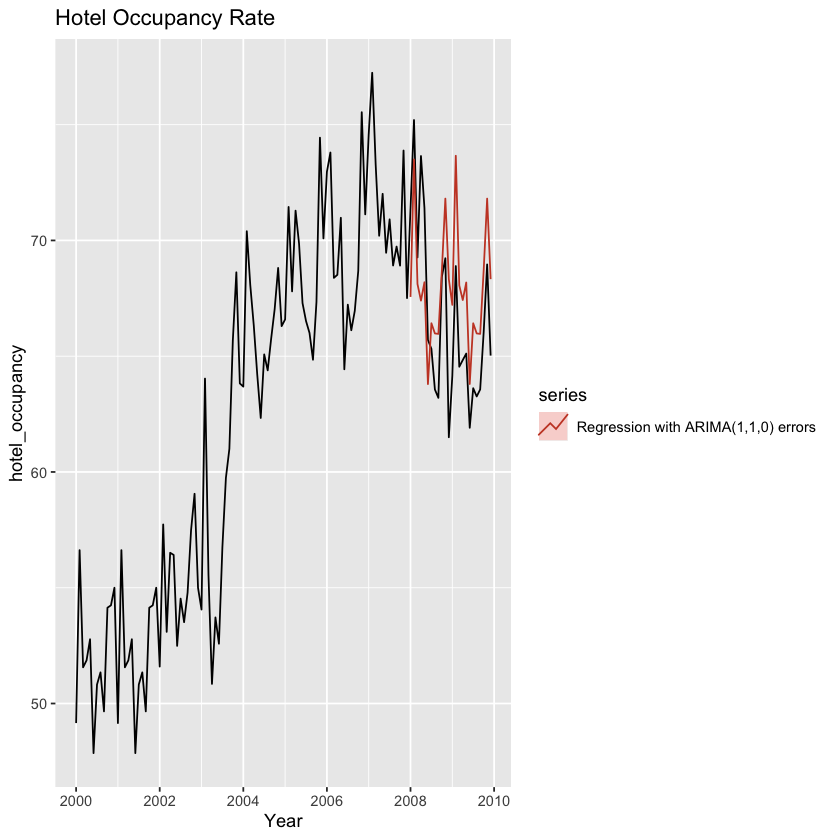

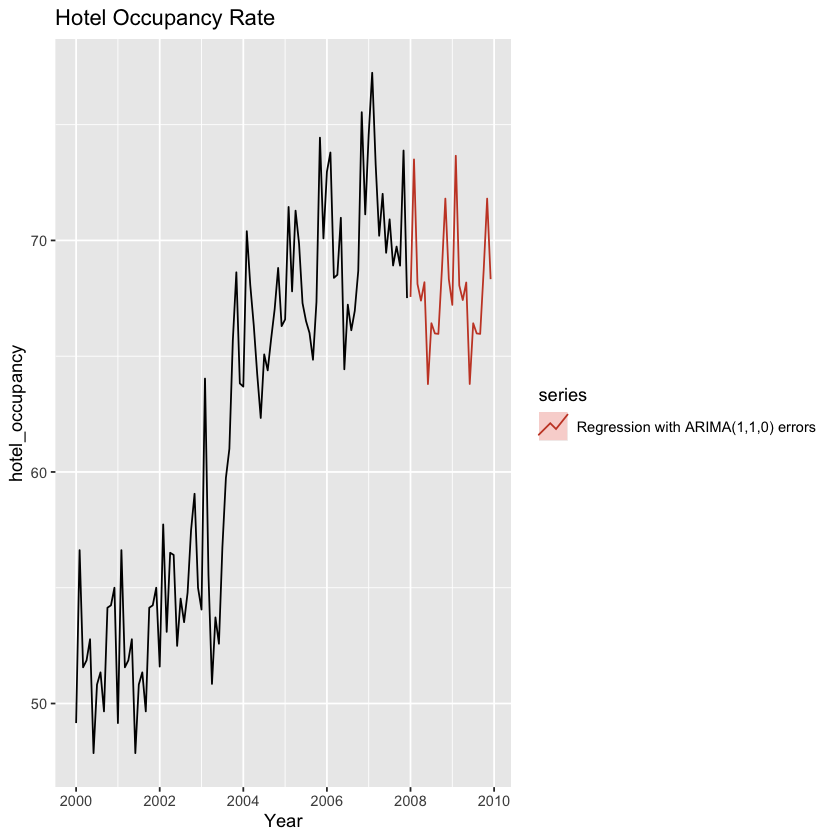

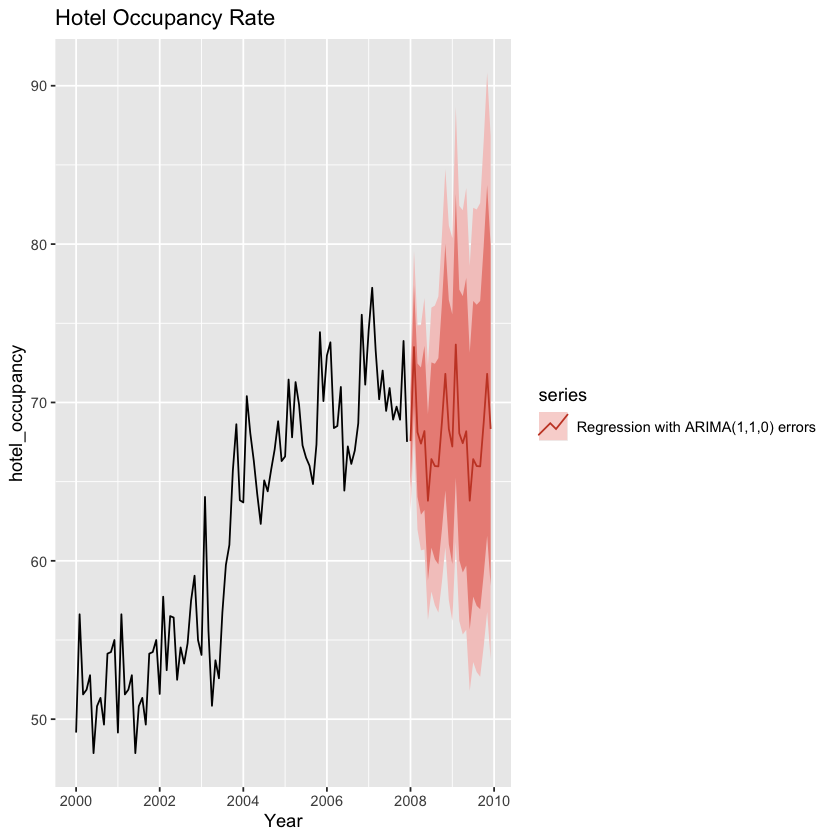

In [15]:
hotel_bestf <- forecast(hotel_best, xreg = fourier(hotel, K = 5, h = 24))

autoplot(hotel) +
    autolayer(hotel_bestf, series = "Regression with ARIMA(1,1,0) errors", PI = FALSE) +
    ggtitle("Hotel Occupancy Rate") + xlab("Year") +
    ylab("hotel_occupancy")

autoplot(hotel_train) +
    autolayer(hotel_bestf, series = "Regression with ARIMA(1,1,0) errors", PI = FALSE) +
    ggtitle("Hotel Occupancy Rate") + xlab("Year") +
    ylab("hotel_occupancy")

autoplot(hotel_train) +
    autolayer(hotel_bestf, series="Regression with ARIMA(1,1,0) errors") +
    ggtitle("Hotel Occupancy Rate") + xlab("Year") +
    ylab("hotel_occupancy")

**Analyze the plot in terms of the forecasting performance selected model (1).**

Best model yielded by the auto.arima() function with xreg argument is Regression with ARIMA(1,1,0) errors. Fitted model fails to capture most of the spikes of the test data. Forecasted data (K=5) seems to be wavy than the others (K < 4). Point foreacasts look reasonable for first few months as the recent observations follow a downward trend. However, prediction intervals have a wide range of forecast values. Forecast for 2008 and 2009 are quite identical (could be because of the sine and cosine functions).

#### 3)

**Generate the accuracy measures of the selected model with respect to the testing dataset.**

In [41]:
accuracy(hotel_bestf, hotel_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.2785759,2.010209,1.553698,0.4096109,2.517393,0.4789332,-0.003586093,NA
Test set,-1.3996603,3.234483,2.901160,-2.2754693,4.369753,0.8942933,0.668969712,0.9229995


**Write a short analysis based on the accuracy measures.**

In this case, I will use MAPE for analysis. Training and test set of the data are 2.517393% and 4.369753%. Selected model seems to perform well based on its relatively low percentage in MAPE. Error increased in test set but still acceptable. Slight issue could be in the outliers (around early 2003 because of its spike).

#### 4)

**Check the residuals of the selected model in (1). Has the selected model in (1) comply with the properties that residuals should have for full extraction of the patterns from the time series? Any recommendations?**

The ACF plot shows that spikes are with the significance limits except for lag 11. Histogram of the residual shows a slightly normal distribution with an outlier on the left (probably the outlier from early 2003). The Ljung-Box test shows the model to be significant. Seems the model passed all the required checks except for the lag 11 in ACF plot. For hotel_occupancy data, I would recommend to fix the outlier found from early 2003 to yield a better result and some variance adjustment.


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,1,0) errors
Q* = 25.656, df = 18, p-value = 0.1079

Model df: 1.   Total lags used: 19




	Anderson-Darling normality test

data:  residuals(hotel_best)
A = 0.5701, p-value = 0.1357


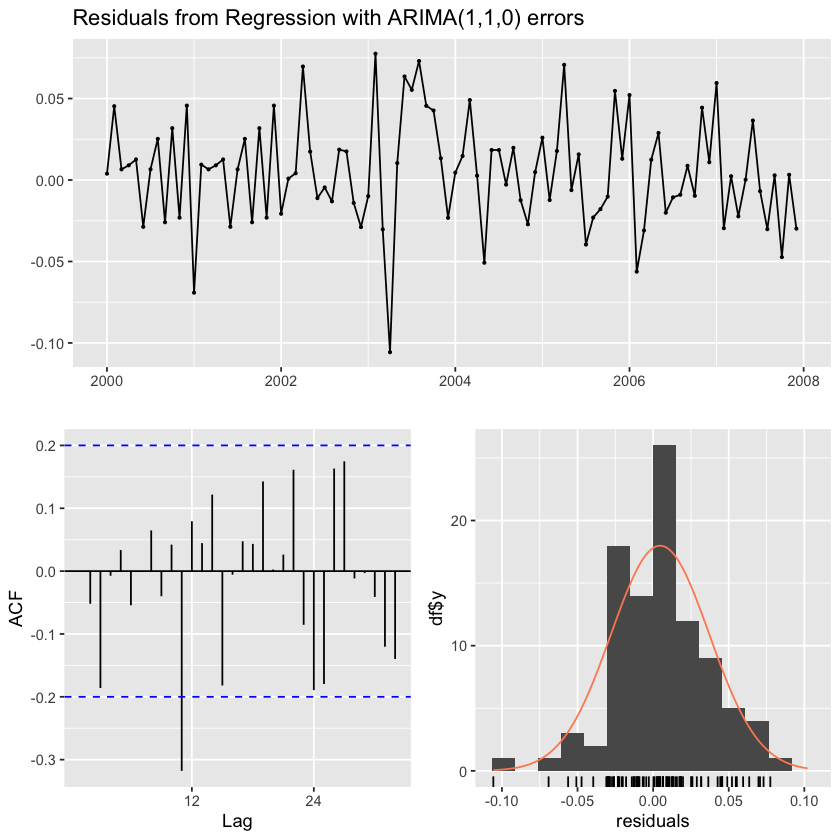

In [42]:
checkresiduals(hotel_best)
nortest::ad.test(residuals(hotel_best))

### Part 2, volpal data

### Data

In [21]:
Philquarter <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilQuarterData.csv", header = TRUE)

volpal <- ts(na.omit(Philquarter$volpal), start = c(1994, 1), end = c(2008, 4), frequency = 4)

#### Train & Test dataset

In [22]:
volpal_train <- window(volpal, end = c(2005, 4)) # Q1 1994 - Q4 2005
volpal_test <- window(volpal, start = c(2006, 1)) # Q1 2006 - Q4 2008

#### 1)

**Show the best performing model based on the AICc of the training dataset**

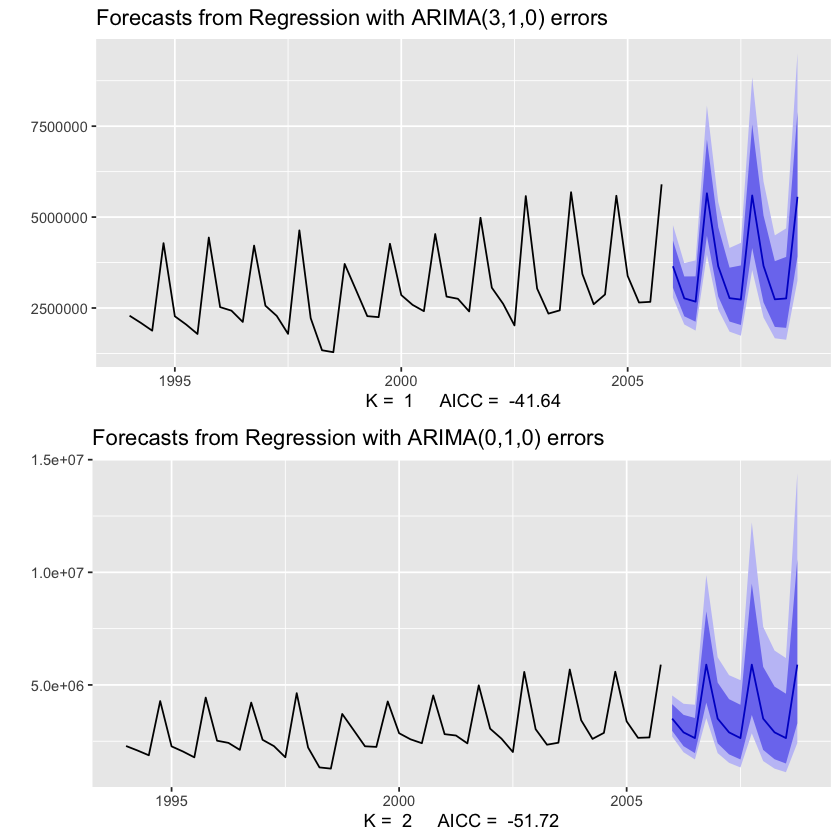

In [23]:
plots2 <- list()

for(i in seq(2)){
    fit <- auto.arima(volpal_train, xreg = fourier(volpal_train, K = i),
        seasonal = FALSE, lambda = 0)
    plots2[[i]] <- autoplot(forecast(fit, xreg = fourier(volpal_train, K = i, h = 12))) +
    xlab(paste("K = ", i, "    AICC = ", round(fit[["aicc"]], 2))) +
    ylab("")
}

gridExtra::grid.arrange(plots2[[1]], plots2[[2]])

In [24]:
volpal_best <- auto.arima(volpal_train, xreg = fourier(volpal_train, K = 2),
                        seasonal = FALSE, lambda = 0)
summary(volpal_best)

# Best model is Regression with ARIMA(0,1,0) errors.

Series: volpal_train 
Regression with ARIMA(0,1,0) errors 
Box Cox transformation: lambda= 0 

Coefficients:
        S1-4    C1-4    C2-4
      0.1416  0.3562  0.1533
s.e.  0.0185  0.0185  0.0093

sigma^2 = 0.01721:  log likelihood = 30.33
AIC=-52.67   AICc=-51.72   BIC=-45.27

Training set error measures:
                   ME   RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 20863.81 399842 305046.5 0.1321926 10.08343 0.9655353 -0.2299832

**Show the state space system of equations form of the model with estimated parameter values**

![Alt text](<Screen Shot 2023-12-12 at 19.46.04-1.png>)

#### 2)

**Show a plot of the forecasted value of volpal for the test data added into the plot of the full dataset.**

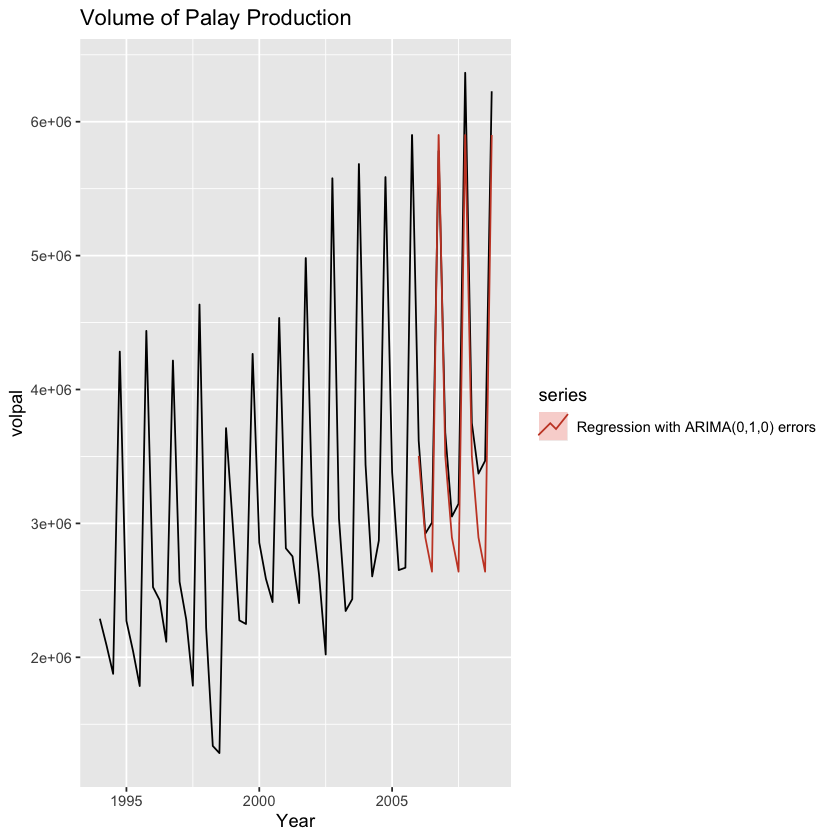

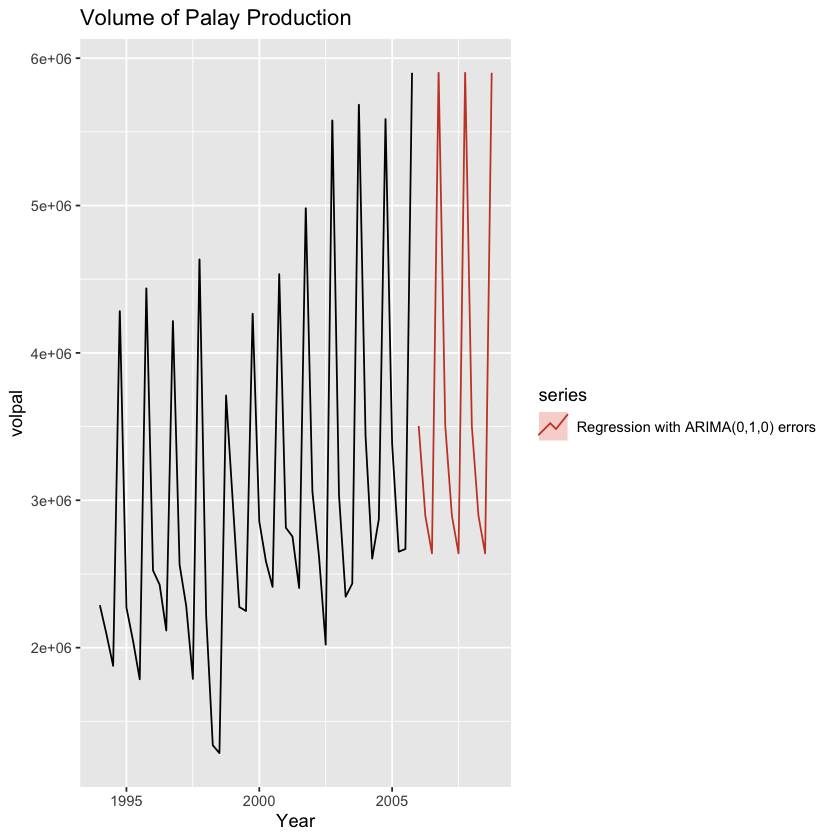

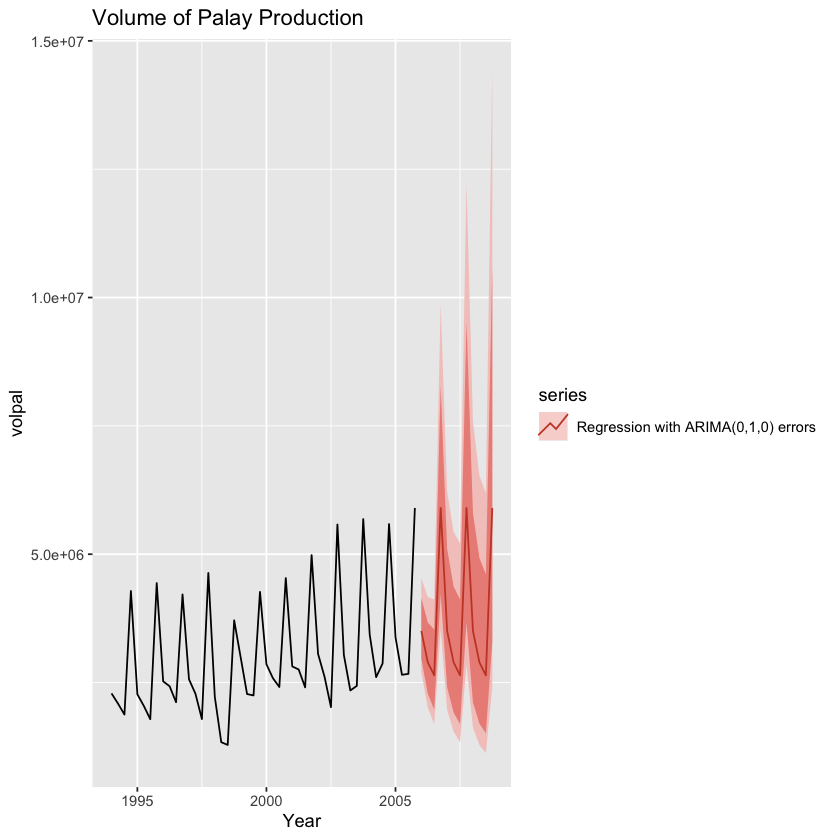

In [25]:
volpal_bestf <- forecast(volpal_best, xreg = fourier(volpal, K = 2, h = 12))

autoplot(volpal) +
    autolayer(volpal_bestf, series = "Regression with ARIMA(0,1,0) errors", PI = FALSE) +
    ggtitle("Volume of Palay Production") + xlab("Year") +
    ylab("volpal")

autoplot(volpal_train) +
    autolayer(volpal_bestf, series = "Regression with ARIMA(0,1,0) errors", PI = FALSE) +
    ggtitle("Volume of Palay Production") + xlab("Year") +
    ylab("volpal")

autoplot(volpal_train) +
    autolayer(volpal_bestf, series="Regression with ARIMA(0,1,0) errors") +
    ggtitle("Volume of Palay Production") + xlab("Year") +
    ylab("volpal")

**Analyze the plot in terms of the forecasting performance selected model (1).**

The volpal data exhibits a strong seasonality and almost persistent upward trend over time. Best model given by the auto.arima() function is Regression with ARIMA(0,1,0) errors. With clear trending going upwards, the forecast data fails to capture the trend of the training data. However, it displays well the seasonality of the data. Point forecast looks reasonable enough (without its trend). For the prediction intervals, it may not provide accurate coverage because of its broad forecast values. Same to part 1, the forecasted values (3 years) are quite identical to each other.

#### 3)

**Generate the accuracy measures of the selected model with respect to the testing dataset.**

In [71]:
accuracy(volpal_bestf, volpal_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,20863.81,399842.0,305046.5,0.1321926,10.083431,0.9655353,-0.2299832,NA
Test set,297077.00,383934.7,317038.3,8.1045113,8.449799,1.0034919,0.2402146,0.2317271


**Write a short analysis based on the accuracy measures.**

Training and test set of the model is 10.083431% and 8.449799%, respectively. The results for MAPE are somewhat expected to be quite low because of how the forecasted data fitted well. It could be worth mentioning that ARIMA model slightly performs better than dynamic harmonic regression.

#### 4)

**Check the residuals of the selected model in (1). Has the selected model in (1) comply with the properties that residuals should have for full extraction of the patterns from the time series? Any recommendations?**

The ACF plot is generally significant except for lag 8. Histogram follows a normal distribution with no outliers to both sides. Ljung-Box test shows the data to be significant also. For recommendations, maybe some improvement again with variance adjustment because of the peaks within year 1998. Other than that, best model is performing well.


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,1,0) errors
Q* = 14.713, df = 8, p-value = 0.06498

Model df: 0.   Total lags used: 8




	Anderson-Darling normality test

data:  residuals(volpal_best)
A = 0.12889, p-value = 0.9821


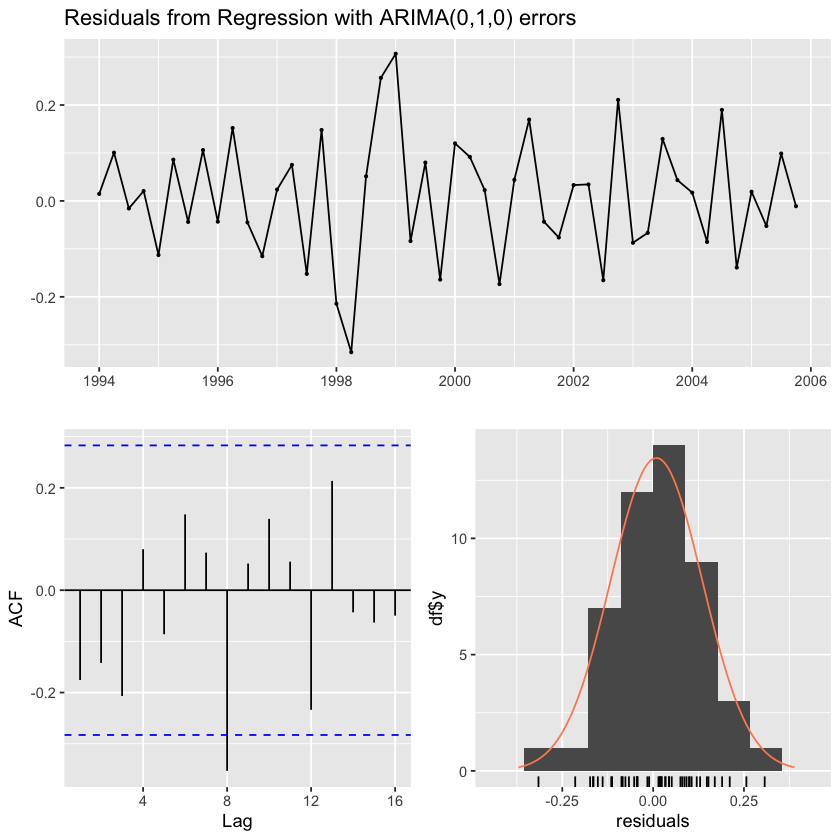

In [73]:
checkresiduals(volpal_best)
nortest::ad.test(residuals(volpal_best))